In [7]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

#import csv
weather_path='2550762.csv'
weatherdata=pd.read_csv(weather_path)
#print(weatherdata.dtypes)
weatherdata.head(20)

,STATION,NAME,DATE,AWND,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,...,TAVG,TMAX,TMIN,WDF2,WDF5,WDFG,WDMV,WSF2,WSF5,WSFG
0,USR0000CNUC,"NUCLA COLORADO, CO US",2015,NaN,816.0,NaN,NaN,-2.0,NaN,NaN,...,53.1,66.6,39.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USR0000CNUC,"NUCLA COLORADO, CO US",2016,NaN,839.0,NaN,NaN,0.0,NaN,NaN,...,52.9,66.7,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USR0000CNUC,"NUCLA COLORADO, CO US",2017,NaN,1039.0,NaN,NaN,-1.0,NaN,NaN,...,54.8,69.0,40.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USR0000CNUC,"NUCLA COLORADO, CO US",2018,NaN,1229.0,NaN,NaN,8.0,NaN,NaN,...,54.0,67.9,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USR0000CNUC,"NUCLA COLORADO, CO US",2019,NaN,972.0,NaN,NaN,-1.0,NaN,NaN,...,51.6,65.0,38.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USR0000CNUC,"NUCLA COLORADO, CO US",2020,NaN,1188.0,NaN,NaN,3.0,NaN,NaN,...,53.7,68.2,39.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USC00055934,"NEW RAYMER 21 N, CO US",2015,NaN,479.0,56.0,14.0,-7.0,10.0,6.5,...,48.8,62.8,34.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USC00055934,"NEW RAYMER 21 N, CO US",2016,NaN,581.0,66.0,13.0,-19.0,13.0,10.0,...,49.0,63.8,34.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USC00055934,"NEW RAYMER 21 N, CO US",2017,NaN,543.0,48.0,9.0,-16.0,6.0,6.0,...,49.1,64.0,34.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USC00055934,"NEW RAYMER 21 N, CO US",2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#summarize data
weatherdescribe=weatherdata.describe()
weatherdescribe

,DATE,AWND,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,...,TAVG,TMAX,TMIN,WDF2,WDF5,WDFG,WDMV,WSF2,WSF5,WSFG
count,549.000000,14.000000,289.000000,263.000000,180.000000,297.000000,263.000000,180.000000,433.000000,296.000000,...,291.000000,296.000000,297.000000,12.000000,12.000000,5.000000,6.000000,12.000000,12.000000,5.000000
mean,2017.579235,13.085714,345.809689,133.022814,23.088889,-9.686869,33.288973,9.174444,1.357483,89.101351,...,44.828522,58.035811,31.382155,244.166667,278.333333,271.400000,8968.883333,47.091667,63.658333,45.560000
std,1.717133,11.736521,419.566586,85.167457,19.106373,8.869146,28.146159,4.813193,0.506186,9.719622,...,6.191756,7.561984,5.910845,110.161727,45.693312,21.078425,594.202751,7.408651,8.989030,6.577842
min,2015.000000,5.600000,0.000000,1.000000,3.000000,-48.000000,1.000000,1.300000,0.390000,69.000000,...,33.500000,43.400000,15.900000,10.000000,220.000000,240.000000,8177.900000,38.000000,51.000000,40.000000
25%,2016.000000,6.300000,0.000000,48.000000,11.000000,-14.000000,8.500000,5.800000,1.000000,81.000000,...,38.900000,51.200000,27.200000,237.500000,250.000000,269.000000,8667.050000,40.675000,56.725000,40.900000
50%,2018.000000,11.600000,138.000000,138.000000,17.000000,-9.000000,21.000000,8.000000,1.250000,90.000000,...,45.300000,58.900000,31.400000,280.000000,265.000000,273.000000,8827.800000,47.550000,62.550000,42.900000
75%,2019.000000,12.200000,652.000000,217.000000,27.000000,-5.000000,58.000000,11.925000,1.600000,97.000000,...,50.100000,64.000000,36.200000,320.000000,322.500000,276.000000,9455.125000,52.550000,74.000000,48.100000
max,2020.000000,49.700000,1584.000000,262.000000,94.000000,14.000000,142.000000,25.000000,3.380000,106.000000,...,57.200000,73.500000,43.800000,340.000000,350.000000,299.000000,9702.100000,61.100000,74.000000,55.900000


In [6]:
weatherstat=weatherdata.groupby(["DATE"])
weather1=weatherstat.mean()
weather1


,AWND,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,...,TAVG,TMAX,TMIN,WDF2,WDF5,WDFG,WDMV,WSF2,WSF5,WSFG
DATE,,,,,,,,,,,,,,,,,,,,,
2015,22.300000,311.326087,141.975000,24.240000,-7.739130,32.975000,9.196000,1.513175,87.000000,7548.040816,...,44.932609,57.650000,32.221739,275.0,270.0,NaN,8646.4,42.50,56.50,NaN
2016,14.533333,317.260870,133.878049,22.481481,-11.000000,38.414634,11.677778,1.366056,89.702128,7781.520833,...,44.859574,57.902128,31.660417,285.0,260.0,240.0,8177.9,51.00,65.50,55.9
2017,8.950000,337.521739,124.951220,20.666667,-11.765957,32.536585,9.113333,1.507639,88.895833,7220.113636,...,46.093617,59.254167,32.840426,135.0,265.0,276.0,9631.3,44.05,55.45,42.9
2018,9.200000,390.895833,119.311111,20.000000,-6.367347,24.177778,6.974194,1.269306,89.877551,7170.020833,...,45.189583,58.406122,31.591837,165.0,295.0,299.0,9702.1,48.95,64.95,48.1
2019,8.800000,345.403846,151.127660,30.354839,-10.754717,41.021277,10.316129,1.287067,89.113208,8272.640000,...,43.434615,56.522642,30.001887,315.0,285.0,269.0,8729.0,45.05,68.55,40.0
2020,9.400000,368.117647,126.979592,21.166667,-10.333333,30.836735,8.244444,1.237500,89.849057,7890.115385,...,44.621569,58.556604,30.314815,290.0,295.0,273.0,8926.6,51.00,71.00,40.9


In [12]:
weather1.columns

Index(['AWND', 'CDSD', 'DSND', 'DSNW', 'EMNT', 'EMSD', 'EMSN', 'EMXP', 'EMXT',
       'HDSD', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WDFG',
       'WDMV', 'WSF2', 'WSF5', 'WSFG'],
      dtype='object')

In [15]:
weather1

,AWND,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,...,TAVG,TMAX,TMIN,WDF2,WDF5,WDFG,WDMV,WSF2,WSF5,WSFG
DATE,,,,,,,,,,,,,,,,,,,,,
2015,22.300000,311.326087,141.975000,24.240000,-7.739130,32.975000,9.196000,1.513175,87.000000,7548.040816,...,44.932609,57.650000,32.221739,275.0,270.0,NaN,8646.4,42.50,56.50,NaN
2016,14.533333,317.260870,133.878049,22.481481,-11.000000,38.414634,11.677778,1.366056,89.702128,7781.520833,...,44.859574,57.902128,31.660417,285.0,260.0,240.0,8177.9,51.00,65.50,55.9
2017,8.950000,337.521739,124.951220,20.666667,-11.765957,32.536585,9.113333,1.507639,88.895833,7220.113636,...,46.093617,59.254167,32.840426,135.0,265.0,276.0,9631.3,44.05,55.45,42.9
2018,9.200000,390.895833,119.311111,20.000000,-6.367347,24.177778,6.974194,1.269306,89.877551,7170.020833,...,45.189583,58.406122,31.591837,165.0,295.0,299.0,9702.1,48.95,64.95,48.1
2019,8.800000,345.403846,151.127660,30.354839,-10.754717,41.021277,10.316129,1.287067,89.113208,8272.640000,...,43.434615,56.522642,30.001887,315.0,285.0,269.0,8729.0,45.05,68.55,40.0
2020,9.400000,368.117647,126.979592,21.166667,-10.333333,30.836735,8.244444,1.237500,89.849057,7890.115385,...,44.621569,58.556604,30.314815,290.0,295.0,273.0,8926.6,51.00,71.00,40.9


In [17]:
index=weather1.index
index

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='DATE')

In [25]:
precip1=weatherdata[['DATE', 'PRCP']]
precip1=precip.dropna()

precip2=precip1.groupby(["DATE"])
precip=precip2.mean()
precip

,PRCP
DATE,
2015,23.617286
2016,19.192778
2017,20.588243
2018,16.454800
2019,21.325325
2020,14.161463


<IPython.core.display.Javascript object>


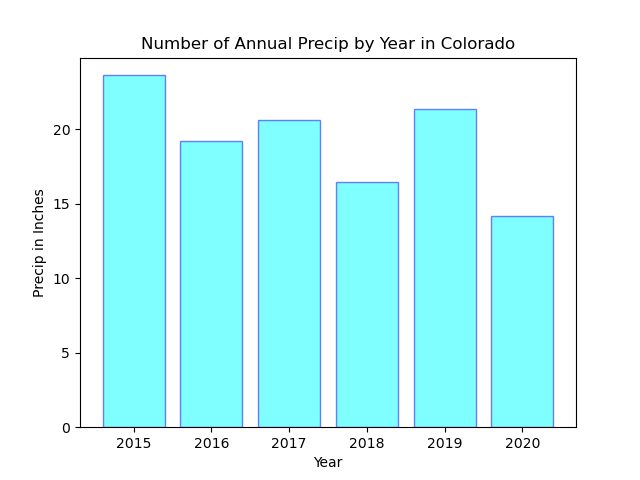

Text(0.5, 1.0, 'Number of Annual Precip by Year in Colorado')

In [28]:

x_axis=index
y_axis=weather1['PRCP']
plt.bar(x_axis, y_axis, color='cyan', edgecolor='blue', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Number of Annual Precip by Year in Colorado')
